In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [2]:
dataset = pd.read_csv("/home/gautam/airflow/projects/Project Predicting Heart Diesease/dataset.csv")

In [3]:
dataset.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

In [6]:
correlation = dataset.corr()
print(correlation)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

/tmp/ipykernel_104880/3369192263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=dataset, palette="husl")


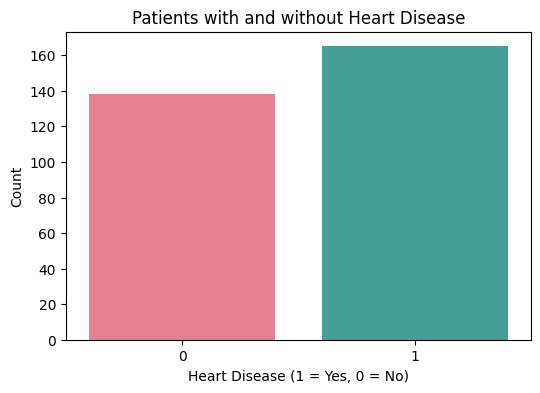

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=dataset, palette="husl")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.title("Patients with and without Heart Disease")
plt.show()

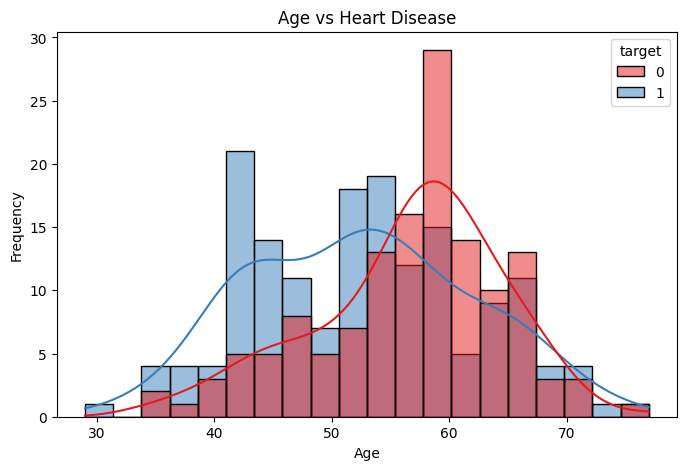

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data=dataset, x="age", hue="target", kde=True, bins=20, palette="Set1")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age vs Heart Disease")
plt.show()

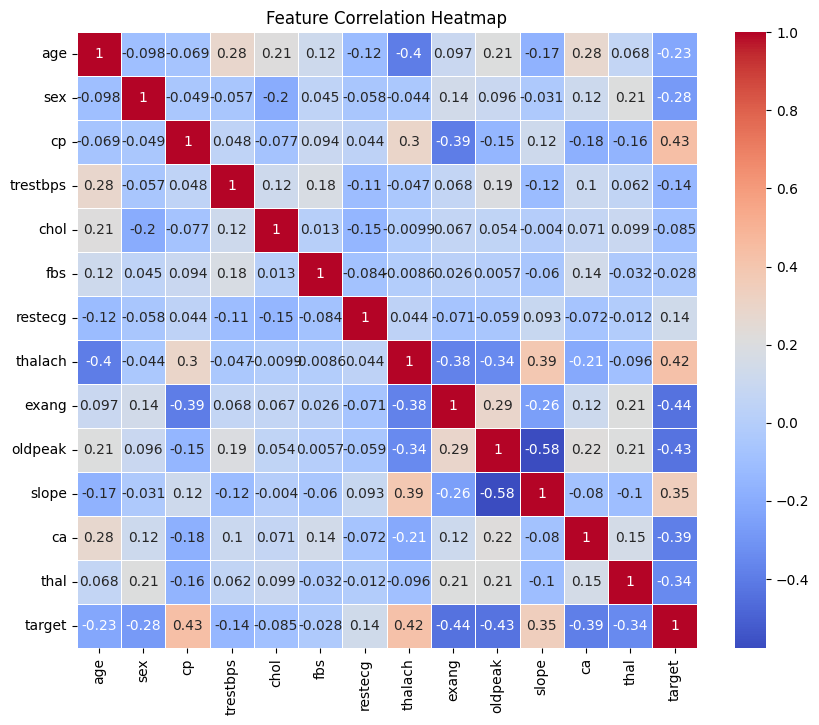

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
X = dataset.drop("target", axis=1)
y = dataset["target"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)

/home/gautam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [13]:
y_pred_logistic = logistic_model.predict(X_test)

In [14]:
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

Logistic Regression Confusion Matrix:
 [[32  9]
 [ 8 42]]
Accuracy: 0.8131868131868132


In [16]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred_tree = tree_model.predict(X_test)

In [18]:
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree Confusion Matrix:
 [[32  9]
 [14 36]]
Accuracy: 0.7472527472527473


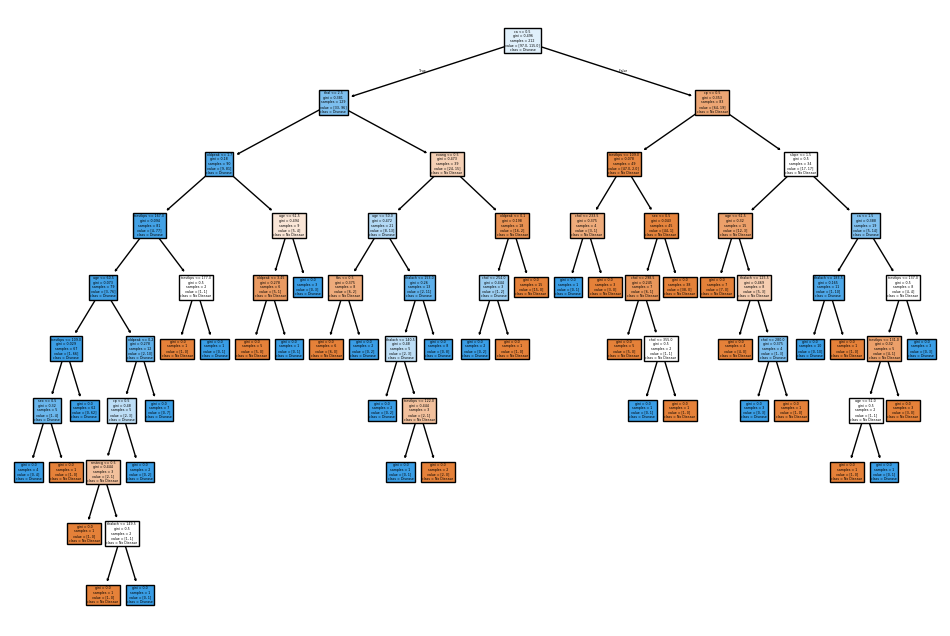

In [19]:
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred_rf = rf_model.predict(X_test)

In [22]:
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Confusion Matrix:
 [[33  8]
 [ 8 42]]
Accuracy: 0.8241758241758241


In [23]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logistic))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        41
           1       0.80      0.72      0.76        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91

Random Forest Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91

In [24]:
logistic_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic),
    "Recall": recall_score(y_test, y_pred_logistic),
    "F1 Score": f1_score(y_test, y_pred_logistic)
}

In [25]:
tree_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": precision_score(y_test, y_pred_tree),
    "Recall": recall_score(y_test, y_pred_tree),
    "F1 Score": f1_score(y_test, y_pred_tree)
}

In [26]:
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf)
}

In [27]:
print("\nModel Comparison:")
print(f"Logistic Regression: {logistic_metrics}")
print(f"Decision Tree: {tree_metrics}")
print(f"Random Forest: {rf_metrics}")


Model Comparison:
Logistic Regression: {'Accuracy': 0.8131868131868132, 'Precision': 0.8235294117647058, 'Recall': 0.84, 'F1 Score': 0.8316831683168316}
Decision Tree: {'Accuracy': 0.7472527472527473, 'Precision': 0.8, 'Recall': 0.72, 'F1 Score': 0.7578947368421053}
Random Forest: {'Accuracy': 0.8241758241758241, 'Precision': 0.84, 'Recall': 0.84, 'F1 Score': 0.84}


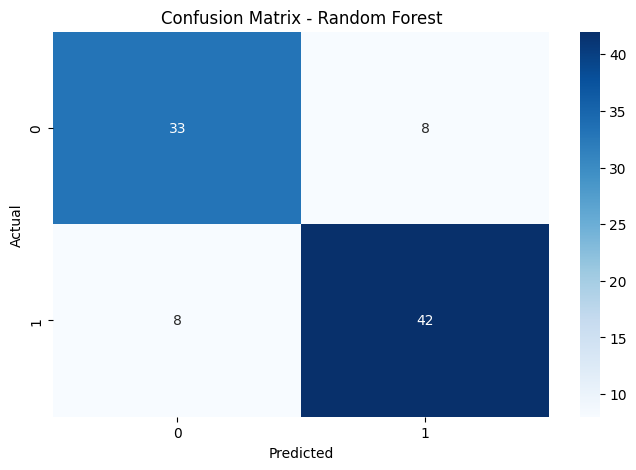

In [28]:
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()